Epoch 1: Weights=[ 0.39671415 -0.2382643 ], Bias=0.34768853810069256
Epoch 2: Weights=[ 0.29671415 -0.3382643 ], Bias=0.04768853810069254
Epoch 3: Weights=[ 0.29671415 -0.2382643 ], Bias=-0.052311461899307465
Epoch 4: Weights=[ 0.29671415 -0.1382643 ], Bias=-0.052311461899307465
Epoch 5: Weights=[ 0.29671415 -0.0382643 ], Bias=-0.052311461899307465
Epoch 6: Weights=[ 0.19671415 -0.0382643 ], Bias=-0.15231146189930747
Epoch 7: Weights=[0.19671415 0.0617357 ], Bias=-0.15231146189930747
Epoch 8: Weights=[0.19671415 0.1617357 ], Bias=-0.15231146189930747
Epoch 9: Weights=[0.19671415 0.0617357 ], Bias=-0.2523114618993075
Epoch 10: Weights=[0.19671415 0.0617357 ], Bias=-0.2523114618993075
Epoch 11: Weights=[0.19671415 0.0617357 ], Bias=-0.2523114618993075
Epoch 12: Weights=[0.19671415 0.0617357 ], Bias=-0.2523114618993075
Epoch 13: Weights=[0.19671415 0.0617357 ], Bias=-0.2523114618993075
Epoch 14: Weights=[0.19671415 0.0617357 ], Bias=-0.2523114618993075
Epoch 15: Weights=[0.19671415 0.0617

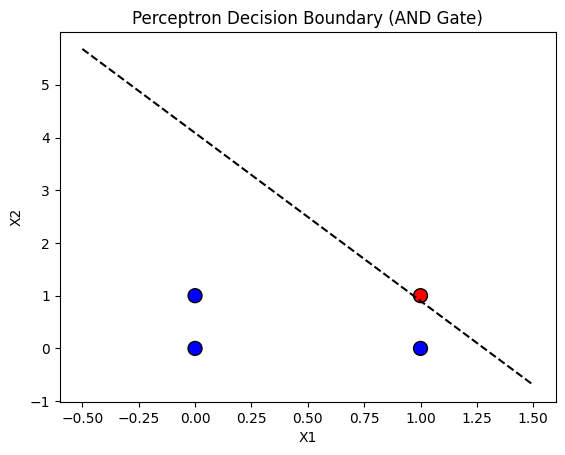

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------
# 1. Create Linearly Separable Dataset (AND Gate)
# ------------------------
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = np.array([0, 0, 0, 1])  # AND gate labels

# ------------------------
# 2. Perceptron Parameters
# ------------------------
np.random.seed(42)
weights = np.random.randn(2)
bias = np.random.randn()
lr = 0.1
epochs = 20

# Activation function (step)
def step_function(z):
    return np.where(z >= 0, 1, 0)

# ------------------------
# 3. Training Loop
# ------------------------
for epoch in range(epochs):
    for i in range(len(X)):
        z = np.dot(X[i], weights) + bias
        pred = step_function(z)
        error = y[i] - pred

        # Update rule
        weights += lr * error * X[i]
        bias += lr * error
    # Print progress
    print(f"Epoch {epoch+1}: Weights={weights}, Bias={bias}")

# ------------------------
# 4. Plot Decision Boundary
# ------------------------
x1 = np.linspace(-0.5, 1.5, 100)
x2 = -(weights[0]*x1 + bias)/weights[1]

plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=100, edgecolors='k')
plt.plot(x1, x2, 'k--')
plt.title("Perceptron Decision Boundary (AND Gate)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

Let's define the components of our perceptron:

*   **Input Vector:** $X = [x_1, x_2, \dots, x_n]$
*   **Weight Vector:** $W = [w_1, w_2, \dots, w_n]$
*   **Bias:** $b$
*   **Weighted Sum (or Net Input):** $z = W \cdot X + b = \sum_{j=1}^{n} w_j x_j + b$
*   **Activation Function (Step Function):** $f(z) = \begin{cases} 1 & \text{if } z \ge 0 \\ 0 & \text{if } z < 0 \end{cases}$
*   **Predicted Output:** $pred = f(z)$
*   **Actual Output (Target):** $y$
*   **Learning Rate:** $lr$
*   **Error:** $error = y - pred$

The goal of the perceptron learning algorithm is to adjust the weights and bias whenever a training example is misclassified, moving them in a direction that reduces the error for that specific example. The update rule is typically applied for each misclassified instance.

Let's consider the two cases of misclassification:

### Case 1: Predicted Output is 0, but Actual Output is 1 ($pred = 0, y = 1$)

In this case, the perceptron predicted 0, but it should have predicted 1. This means that the weighted sum $z$ was less than 0 (or equal to 0, depending on the exact definition, but let's assume it led to a 0 output). We need to *increase* $z$ so that $pred$ becomes 1. To increase $z$, we need to increase the weights $W$ and/or the bias $b$.

*   **Error for this case:** $error = y - pred = 1 - 0 = 1$
*   **Update Rule for Weights:** To increase $W \cdot X$, we should add a fraction of $X$ to $W$. So, for each weight $w_j$:
    $w_j \leftarrow w_j + lr \cdot x_j$
    In vector form: $W \leftarrow W + lr \cdot X$
*   **Update Rule for Bias:** To increase $b$, we should add a fraction of $1$ (implicitly, since bias has an input of 1) to $b$.
    $b \leftarrow b + lr \cdot 1$

Notice that if we use the calculated `error = 1`, the update rules become:
*   $W \leftarrow W + lr \cdot error \cdot X$
*   $b \leftarrow b + lr \cdot error$

### Case 2: Predicted Output is 1, but Actual Output is 0 ($pred = 1, y = 0$)

In this case, the perceptron predicted 1, but it should have predicted 0. This means that the weighted sum $z$ was greater than or equal to 0. We need to *decrease* $z$ so that $pred$ becomes 0. To decrease $z$, we need to decrease the weights $W$ and/or the bias $b$.

*   **Error for this case:** $error = y - pred = 0 - 1 = -1$
*   **Update Rule for Weights:** To decrease $W \cdot X$, we should subtract a fraction of $X$ from $W$. So, for each weight $w_j$:
    $w_j \leftarrow w_j - lr \cdot x_j$
    In vector form: $W \leftarrow W - lr \cdot X$
*   **Update Rule for Bias:** To decrease $b$, we should subtract a fraction of $1$ from $b$.
    $b \leftarrow b - lr \cdot 1$

Again, if we use the calculated `error = -1`, the update rules become:
*   $W \leftarrow W + lr \cdot (-1) \cdot X = W + lr \cdot error \cdot X$
*   $b \leftarrow b + lr \cdot (-1) = b + lr \cdot error$

### Conclusion

As you can see, in both misclassification cases, the update rule consistently becomes:

$W \leftarrow W + lr \cdot (y - pred) \cdot X$
$b \leftarrow b + lr \cdot (y - pred)$

When the perceptron correctly classifies an example, $y - pred = 0$, so the weights and bias remain unchanged. This derivation directly shows why the error term $(y - pred)$ is multiplied by the learning rate and the input features when updating the weights and bias in the perceptron algorithm.